In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,-0.813875,2.263961,-2.404267,0.539918,2.515491,0.263140,-0.171599,0.915024,0.726361,0.231064,0.935516,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,1.193458,1.768046,-2.243744,1.923132,0.508340,-0.461116,0.444660,-0.708002,0.157251,-0.660755,0.884055,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,-1.597722,1.236858,-2.679822,0.121389,1.488705,0.355190,0.825615,-0.510001,1.853563,-0.140442,0.082038,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,-0.518488,0.443094,-1.829303,2.852460,1.701912,-0.037339,0.122023,0.230354,-0.535946,0.058243,0.211006,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


In [ ]:
# data[data.duplicated(keep=True)].head(30)
data= data.duplicated(keep=False)
data

0       False
1       False
2       False
3       False
4       False
        ...  
3968    False
3969    False
3970    False
3971    False
3972    False
Length: 3973, dtype: bool

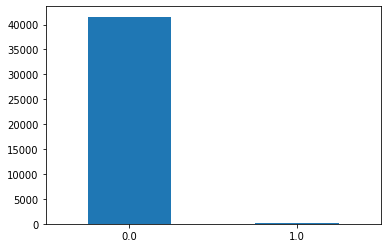

In [ ]:
# a = pd.value_counts(data["Class"],sort = True)
# a.plot(kind = 'bar',rot =0)
import seaborn as sns
a = pd.value_counts(data['Class'],sort=True)
a.plot(kind= 'bar',rot = 0)


In [ ]:
fraud = data.loc[data['Class']==1]
fraud
normal = data.loc[data["Class"]==0]
normal
len(fraud)
len(normal)


47481

In [ ]:
fraud = len(data[data['Class'] == 1])/len(data)*100
no_fraud = len(data[data['Class'] == 0])/len(data)*100
fraud_percentage = [fraud,no_fraud]
fraud_percentage



[0.05021760964178105, 99.93304318714429]

In [ ]:
data = data.fillna(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


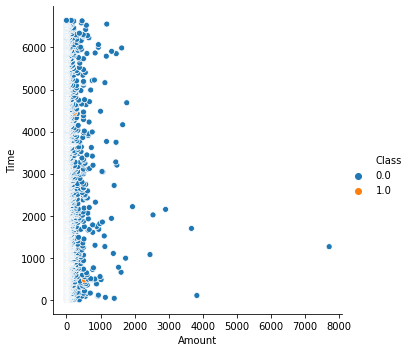

In [ ]:
import seaborn as sns
sns.relplot(x="Amount",y="Time",hue="Class",data=data)

In [ ]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = data.iloc[:,:-1]
y = data["Class"]
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .25)
# x_train = x_train.fillna(x_train.mean())
# y_train = y_train.fillna(y_train.mean())
# x_test = x_test.fillna(x_test.mean())
# y_test = y_test.fillna(y_test.mean())

# lr = LinearRegression()



In [ ]:
from imblearn.combine import SMOTETomek
SMOTETomek(ratio={1:20, 0:80})
# smk = SMOTETomek(0.75)
res = smk.fit_resample(x,y)
import collections 
import Counter
# print('resamble  da')
#  smt = SMOTETomek(random_state=42)
# >>> X_res, y_res = smt.fit_resample(X, y)

In [ ]:
model = lr.fit(x_train,y_train) 
y_pred = model.predict(x_test)
y_pred

array([ 0.00341486, -0.00242615, -0.00474922, ...,  0.00154925,
       -0.00117325, -0.00040193])

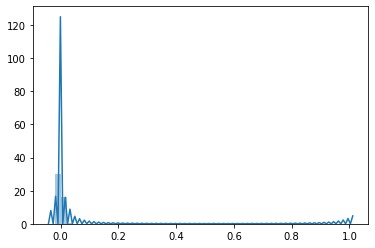

In [ ]:
import seaborn as sns
sns.distplot(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# confusion_matrix(y_pred,y_test)

# accuracy_score(y_pred,y_test.round(),normalize=False)
accuracy_score(y_test,y_pred.round())*100

99.68925841941714